In [ ]:
!pip install git+https://github.com/wbaek/theconf@de32022f8c0651a043dc812d17194cdfd62066e8
!pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git@v0.2
!pip install git+https://github.com/ildoonet/pystopwatch2.git
!pip install pretrainedmodels
!pip install tqdm
!pip install tensorboardx
!pip install psutil
!pip install requests
!pip install Pillow -U

  Cloning https://github.com/wbaek/theconf (to revision de32022f8c0651a043dc812d17194cdfd62066e8) to /tmp/pip-req-build-z8zwq088
  Running command git clone -q https://github.com/wbaek/theconf /tmp/pip-req-build-z8zwq088
  Running command git rev-parse -q --verify 'sha^de32022f8c0651a043dc812d17194cdfd62066e8'
  Running command git fetch -q https://github.com/wbaek/theconf de32022f8c0651a043dc812d17194cdfd62066e8
  Running command git checkout -q de32022f8c0651a043dc812d17194cdfd62066e8
     |████████████████████████████████| 180 kB 12.6 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for theconf: filename=theconf-0.1.0-py3-none-any.whl size=9669 sha256=46355de4e5747ba439df998f4e623cdc965574e0f6e0546bac8975ff0b465dd4
  Stored in directory: /root/.cache/pip/wheels/b3/f6/32/c7948395c7a3b1559505974da0b75e72d43519f33b51565dce
Successfully built theconf
  Cloning https://github.com/ildoonet/pytorch-gradual-warmup-lr.git (to revision v0.2) to /tmp/pip-req-build-

     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=2db145c28b3287b9dd46d4fc5dc6379de3ec76be94620ca46a80641a27fcfa61
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels
     |████████████████████████████████| 124 kB 14.9 MB/s 
     |████████████████████████████████| 3.1 MB 15.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!git clone https://github.com/zakaria-aabbou/UDA_mnist.git

fatal: destination path 'UDA_mnist' already exists and is not an empty directory.


In [ ]:
!pwd

/content


In [ ]:
%cd /content/UDA_mnist

/content/UDA_mnist


In [ ]:
# !python main.py --mod 'semisup' --sup_num 100 --val_num 20 --sup_aug 'crop' 'hflip' --unsup_aug 'randaug' --bsz_sup 20 --bsz_unsup 448 --max_iter 20 --eval_idx 2

In [ ]:
# !python main.py --mod 'semisup'

In [ ]:
# -*- coding: utf-8 -*-
"""
Unsupervised Data Augmentation
=====================

We load MNIST dataset and train a classification model in semi-supervised
(or supervised) setting.


Input data
----------------
MNIST dataset has the classes: 0 ... 9. 
The images in CIFAR-10 are of size 1x28x28, 
i.e. 1-channel gray images of 28x28 pixels in size.


Features
----------------
--mod:          default='semisup':          Supervised (sup) or semi-supervised training (semisup)
--sup_num:      default=4000:               Number of samples in supervised training set (out of 50K)
--val_num:      default=1000:               Number of samples in validation set (out of 50K)
--rand_seed:    default=89:                 Random seed for dataset shuffle
--sup_aug:      default=['crop', 'hflip']:  Data augmentation for supervised and unsupervised samples (crop, hflip, cutout, randaug)
--unsup_aug:    default=['randaug']:        Data augmentation (Noise) for unsupervised noisy samples (crop, hflip, cutout, randaug)
--bsz_sup:      default=64:                 Batch size for supervised training
--bsz_unsup:    default=448:                Batch size for unsupervised training
--softmax_temp: default=0.4:                Softmax temperature for target distribution (unsup)
--conf_thresh:  default=0.8:                Confidence threshold for target distribution (unsup)
--unsup_loss_w: default=1.0:                Unsupervised loss weight
--max_iter:     default=500000:             Total training iterations
--vis_idx:      default=10:                 Output visualization index
--eval_idx:     default=1000:               Validation index
--out_dir:      default='./output/':        Output directory


Examples runs
----------------
For semi supervised training:
>> python main.py --mod 'semisup' --sup_num 4000 --sup_aug 'crop' 'hflip' --unsup_aug 'randaug' --bsz_sup 64 --bsz_sup 448

For supervised training:
>> python main.py --mod 'sup' --sup_num 49000 --sup_aug 'randaug' --bsz_sup 64

Notes
----------------
Some of the code for this implementation was borrowed from online sources, as detailed below:

- Wide_ResNet in model.py: https://github.com/wang3702/EnAET/blob/73fd514c74de18c4f7c091012e5cff3a79e1ddbf/Model/Wide_Resnet.py
    - VanillaNet (initially present in guideline code) also works fine. [substitute Wide_ResNet(28, 2, 0.3, 10) with VanillaNet()]

- RandAugment in randAugment.py: https://github.com/ildoonet/pytorch-randaugment/blob/master/RandAugment/augmentations.py
    - my own simpler implementation of myRandAugment also works fine. [substitute RandAugment with myRandAugment]

- EMA in ema.py: https://github.com/chrischute/squad/blob/master/util.py#L174-L220

"""

"\nUnsupervised Data Augmentation\n=====================\n\nWe load MNIST dataset and train a classification model in semi-supervised\n(or supervised) setting.\n\n\nInput data\n----------------\nMNIST dataset has the classes: 0 ... 9. \nThe images in CIFAR-10 are of size 1x28x28, \ni.e. 1-channel gray images of 28x28 pixels in size.\n\n\nFeatures\n----------------\n--mod:          default='semisup':          Supervised (sup) or semi-supervised training (semisup)\n--sup_num:      default=4000:               Number of samples in supervised training set (out of 50K)\n--val_num:      default=1000:               Number of samples in validation set (out of 50K)\n--rand_seed:    default=89:                 Random seed for dataset shuffle\n--sup_aug:      default=['crop', 'hflip']:  Data augmentation for supervised and unsupervised samples (crop, hflip, cutout, randaug)\n--unsup_aug:    default=['randaug']:        Data augmentation (Noise) for unsupervised noisy samples (crop, hflip, cutout, r

In [ ]:
############################ Imports ###################################
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import torch
import argparse
import torchvision
from datetime import datetime
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

from ema import EMA
from model import Wide_ResNet, VanillaNet
from randAugment import RandAugment, myRandAugment
from data import CIFAR10Sup, CIFAR10Unsup, CIFAR10Val
from data_MNIST import MNIST_Sup , MNIST_Unsup , MNIST_Val

from torch.nn import DataParallel

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [ ]:
########################## Global setting ##############################
'''
Global setting is initialized here:
    - Hyper-prameters (dumped in output directory)
    - Ouput directory
    - Tensorboard writer
'''

MOD = 'semisup'                 # Supervised (sup) or semi-supervised training (semisup)
SUP_NUM = 100                   # default=4000, Number of samples in supervised training set (out of 50K)
VAL_NUM = 10 #1000                  # default=1000, Number of samples in validation set (out of 50K)
RAND_SEED = 89                  # default=89 Random seed for dataset shuffle
SUP_AUG   = ['crop', 'hflip']   # Valid values: crop, hflip, cutout, randaug
UNSUP_AUG = ['randaug']         # Valid values: crop, hflip, cutout, randaug
BSZ_SUP = 50 #64                    # Batch size for supervised training
BSZ_UNSUP = 599 #448                 # Batch size for unsupervised training
SOFTMAX_TEMP = 0.4              # Softmax temperature for target distribution (unsup)
CONF_THRESH = 0.5             # Confidence threshold for target distribution (unsup)
UNSUP_LOSS_W = 1.0              # Unsupervised loss weight
MAX_ITER = 500 #500000               # Total training iterations
VIS_IDX = 10                    # Output visualization index
EVAL_IDX = 100 #1000                 # Validation index
OUT_DIR = './output/'           # Output directory

OUT_DIR = '{}{}/'.format(OUT_DIR ,  datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))
MODEL_PATH = '{}best_model.pth'.format(OUT_DIR)

if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)

# with open('{}args.txt'.format(OUT_DIR), 'w') as f:
#     json.dump(__dict__, f, indent=2)

if MOD == 'semisup':
    print("mode is semisup !!\n")
    #assert SUP_NUM == 4000, "Remove assertion if you wish to have semi sup training with sup set != 4K"

if MOD == 'sup':
    print("mode is sup !!\n")
    # assert SUP_NUM == 49000, "Remove assertion if you wish to have sup training with sup set != 49K"

writer = SummaryWriter(OUT_DIR)

mode is semisup !!



In [ ]:
######################## Data initialization ###########################
'''
Input data is initialized here, along with the train (sup & unsup), valid and test dataloaders:
    - transform_train_sup contains the list of transformations (input params) to be applied to supervised and unsupervised samples.
    - transform_train_unsup contains the list of transformations (input params) to be applied to unsupervised samples (noise injection).
    - transform_test contains the list of transformations (tensor & norm) to be applied to valid and test samples.
'''

SUP_AUG   += ["tensor", "normalize"]
UNSUP_AUG += ["tensor", "normalize"]

transforms_aug = {"crop": transforms.RandomCrop(28, padding=4, padding_mode="reflect"),
                  "hflip": transforms.RandomHorizontalFlip(),
                  "cutout": transforms.RandomErasing(value='random'),
                  "randaug": RandAugment(2, 15),
                  "tensor": transforms.ToTensor(),
                  "normalize": transforms.Normalize(
                      #(0.49138702, 0.48217663, 0.44645257),
                      #(0.24706201, 0.24354138, 0.2616881)
                      [0.5],[0.5]
                      )
                }

transform_train_sup = transforms.Compose(
    [transforms_aug[val] for val in SUP_AUG])
transform_train_unsup = transforms.Compose(
    [transforms_aug[val] for val in UNSUP_AUG])
transform_test = transforms.Compose(
    [transforms_aug[val] for val in ["tensor", "normalize"]])

# trainset_sup = CIFAR10Sup(root='./data', train=True, download=True, transform=[
#                           transform_train_sup], sup_num=SUP_NUM, random_seed=RAND_SEED)
# trainset_unsup = CIFAR10Unsup(root='./data', train=True, download=True, transform=[
#                               transform_train_sup, transform_train_unsup], sup_num=SUP_NUM, random_seed=RAND_SEED)
# validset = CIFAR10Val(root='./data', train=True, download=True, transform=[
#                       transform_test], val_num=VAL_NUM, random_seed=RAND_SEED)
# testset = torchvision.datasets.CIFAR10(
#     root='./data', train=False, download=True, transform=transform_test)


trainset_sup = MNIST_Sup(root='./data', train=True, download=True, transform=[
                          transform_train_sup], sup_num=SUP_NUM, random_seed=RAND_SEED)
trainset_unsup = MNIST_Unsup(root='./data', train=True, download=True, transform=[
                              transform_train_sup, transform_train_unsup], sup_num=SUP_NUM, random_seed=RAND_SEED)
validset = MNIST_Val(root='./data', train=True, download=True, transform=[
                      transform_test], val_num=VAL_NUM, random_seed=RAND_SEED)
testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform_test)




trainloader_sup = torch.utils.data.DataLoader(
    trainset_sup, batch_size=BSZ_SUP, num_workers=2, drop_last=True)
trainloader_unsup = torch.utils.data.DataLoader(
    trainset_unsup, batch_size=BSZ_UNSUP, num_workers=2, drop_last=True)
validloader = torch.utils.data.DataLoader(
    validset, batch_size=4, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST_Sup/raw/train-images-idx3-ubyte.gz to ./data/MNIST_Sup/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST_Sup/raw/train-labels-idx1-ubyte.gz to ./data/MNIST_Sup/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST_Sup/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST_Sup/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST_Sup/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST_Sup/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST_Unsup/raw/train-images-idx3-ubyte.gz to ./data/MNIST_Unsup/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST_Unsup/raw/train-labels-idx1-ubyte.gz to ./data/MNIST_Unsup/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST_Unsup/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST_Unsup/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST_Unsup/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST_Unsup/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST_Val/raw/train-images-idx3-ubyte.gz to ./data/MNIST_Val/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST_Val/raw/train-labels-idx1-ubyte.gz to ./data/MNIST_Val/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST_Val/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST_Val/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST_Val/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST_Val/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
classes = trainset_sup.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
print("trainset supervised shape   : " , trainset_sup.data.shape)
print("trainset unsupervised shape : " , trainset_unsup.data.shape)
print("validset shape              : " , validset.data.shape)

trainset supervised shape   :  torch.Size([100, 28, 28])
trainset unsupervised shape :  torch.Size([58900, 28, 28])
validset shape              :  torch.Size([10, 28, 28])


In [ ]:
print("trainset supervised targets   : " , trainset_sup.targets.shape)
print("\ntrainset unsupervised targets : " , trainset_unsup.targets)
print("\nvalidset targets              : " , validset.targets.shape)

trainset supervised targets   :  (100,)

trainset unsupervised targets :  None

validset targets              :  (10,)


In [ ]:
# testset
print("testset supervised shape   : " , testset.data.shape)
print("\nvalidset targets         : " , testset.targets.shape)


testset supervised shape   :  torch.Size([10000, 28, 28])

validset targets         :  torch.Size([10000])


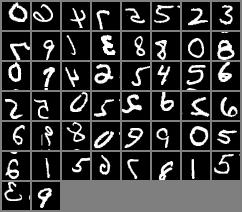

In [ ]:
######################### Visualize data ###############################
'''
Some input samples are visualized here:
    - saved in output directory
    - plotted on tensorboard
'''

from IPython.display import display
from PIL import Image

def unnormalize(img):
    mean = torch.Tensor([0.5]).unsqueeze(-1)
    std = torch.Tensor([0.5]).unsqueeze(-1)
    img = (img.view(2, -1) * std + mean).view(img.shape)
    img = img.clamp(0, 1)
    return img


def save_grid(img):
    npimg = img.numpy()
    path = '{}in_data.jpg'.format(OUT_DIR)
    plt.imsave(path, np.transpose(npimg, (1, 2, 0)))
    display(Image.open(path))



dataiter = iter(trainloader_sup)
images, labels = tqdm(dataiter.next()  , leave=False)
images_grid = torchvision.utils.make_grid(images)
images_grid = unnormalize(images_grid)
save_grid(images_grid)
writer.add_image('input_images', images_grid, 0)



In [ ]:
############################# Model ####################################
'''
Classification model is initialized here, along with exponential
moving average (EMA) module:
    - model is pushed to gpu if its available.
'''

net = Wide_ResNet(28, 2, 0.3, 10)  # VanillaNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net = net.cuda()
# net = DataParallel(net)
print(device)
net.to(device)
ema = EMA(net, decay=0.9999)


| Wide-Resnet 28x2
cpu


In [ ]:
############################## Utils ###################################
'''
Training utils are initialized here, including:
    - CrossEntropyLoss - supervised loss.
    - KLDivLoss - unsupervised consistency loss
    - SGD optimizer
    - CosineAnnealingLR scheduler
    - Evaluation function
'''

criterion_sup = torch.nn.CrossEntropyLoss()
criterion_unsup = torch.nn.KLDivLoss(reduction='none')
optimizer = torch.optim.SGD(
    net.parameters(), lr=0.001, momentum=0.9, nesterov=True)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, MAX_ITER)


def eval_model(model, valloader, write, writer_id):
    correct, total = 0, 0
    model.eval()
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on validation set: %.2f %%' % (100.0 * correct / total))
    write.add_scalar('validation/Accuracy', 100.0 * correct / total, writer_id)
    model.train()
    return correct


In [ ]:
############################ Training ##################################
'''
Training loop containing:
    - data loading
    - optimizer initialization
    - fixed model parameters to generate unsup target logits
    - prediction sharpening of unsup target logits
    - confidence threshold of unsup logits
    - supervised cross entropy loss
    - unsupervised consistency loss
    - exponential moving average of model parameters
    - printing/plotting of the training stats
    - model evaluation every EVAL_IDX iterations
'''

running_loss = [0.0, 0.0, 0.0]
best_val = 0

trainloader_sup_iter = iter(trainloader_sup)

# loop = tqdm(trainloader_sup)
# loop.set_description('[%s %04d/%04d]' % ('desc_default', epoch, EPOCH))

if MOD== 'semisup':
    trainloader_unsup_iter = iter(trainloader_unsup)

for train_idx in range(MAX_ITER):
    # data loading
    img_sup, labels_sup = trainloader_sup_iter.next()
    img_sup, labels_sup = img_sup.to(device), labels_sup.to(device)

    if MOD== 'semisup':
        img_unsup, img_unsup_aug = trainloader_unsup_iter.next()
        img_unsup, img_unsup_aug = img_unsup.to(device), img_unsup_aug.to(device)
        img_in = torch.cat([img_sup, img_unsup_aug])
    else:
        img_in = img_sup

    # optimizer initilization
    optimizer.zero_grad()

    if MOD== 'semisup':
        # fixed parameters of the model to stop gradient back propagation
        with torch.no_grad():
            logits_unsup = net(img_unsup)
            # prediction sharpening
            logits_unsup = logits_unsup / SOFTMAX_TEMP
            # confidence threshold (mask)
            conf_mask = F.softmax(logits_unsup, dim=1).max(dim=1)[0] > CONF_THRESH

    img_out = net(img_in)
    # supervised loss
    logits_sup = img_out[:BSZ_SUP]
    loss_sup = criterion_sup(logits_sup, labels_sup)

    if MOD== 'semisup':
        if conf_mask.sum() > 0:
            # Unsupervised consistency loss
            logits_unsup_aug = img_out[BSZ_SUP:]
            loss_unsup = criterion_unsup(F.log_softmax( logits_unsup_aug, dim=1), F.softmax(logits_unsup, dim=1))
            loss_unsup = loss_unsup[conf_mask]
            loss_unsup = loss_unsup.sum(dim=1).mean()
        else:
            loss_unsup = 0
        loss = loss_sup + (loss_unsup * UNSUP_LOSS_W)
    else:
        loss = loss_sup

    # train optimization
    loss.backward()
    optimizer.step()
    scheduler.step()

    # exponential moving average
    ema(net, train_idx // (BSZ_SUP+BSZ_UNSUP))

    # print/plot stats
    running_loss[0] += loss.item()
    running_loss[1] += loss_sup.item()
    if MOD== 'semisup':
        loss_unsup = loss_unsup.item() if type(loss_unsup) == torch.Tensor else loss_unsup
        running_loss[2] += loss_unsup

    # if MOD== 'semisup':
    #     writer.add_scalar('training/unsup_loss', loss_unsup, train_idx)
    #     print('[%d] loss: %.3f loss_sup: %.3f loss_unsup: %.3f' % (train_idx, running_loss[0] / 100, running_loss[1] / 100, running_loss[2] / 100))
    # else:
    #     print('[%d] loss: %.3f loss_sup: %.3f' % (train_idx, running_loss[0] / 100, running_loss[1] / 100))

    writer.add_scalar('learning_rate', optimizer.param_groups[0]['lr'], train_idx)
    
    if train_idx % VIS_IDX == VIS_IDX-1:
        writer.add_scalar('training/total_loss', loss.item(), train_idx)
        writer.add_scalar('training/sup_loss', loss_sup.item(), train_idx)
        if MOD== 'semisup':
            writer.add_scalar('training/unsup_loss', loss_unsup, train_idx)
            print('[%d] loss: %.3f loss_sup: %.3f loss_unsup: %.3f' % (train_idx, running_loss[0] / 100, running_loss[1] / 100, running_loss[2] / 100))
        else:
            print('[%d] loss: %.3f loss_sup: %.3f' % (train_idx, running_loss[0] / 100, running_loss[1] / 100))
        running_loss = [0.0, 0.0, 0.0]

    # eval model
    if train_idx % EVAL_IDX == EVAL_IDX-1:
        ema.assign(net)
        curr_val = eval_model(net, validloader, writer, train_idx)
        ema.resume(net)
        # save model
        if curr_val > best_val:
            torch.save(net.state_dict(), MODEL_PATH)

    # impose infinite loop
    if train_idx % trainloader_sup_iter.__len__() == trainloader_sup_iter.__len__()-1:
        trainloader_sup_iter = iter(trainloader_sup)
        if MOD== 'semisup':
            trainloader_unsup_iter = iter(trainloader_unsup)

print('Finished Training')

[9] loss: 0.227 loss_sup: 0.227 loss_unsup: 0.000
[19] loss: 0.225 loss_sup: 0.225 loss_unsup: 0.000
[29] loss: 0.222 loss_sup: 0.222 loss_unsup: 0.000
[39] loss: 0.236 loss_sup: 0.220 loss_unsup: 0.015
[49] loss: 0.269 loss_sup: 0.219 loss_unsup: 0.050
[59] loss: 0.285 loss_sup: 0.225 loss_unsup: 0.060
[69] loss: 0.288 loss_sup: 0.230 loss_unsup: 0.058
[79] loss: 0.285 loss_sup: 0.230 loss_unsup: 0.055
[89] loss: 0.291 loss_sup: 0.234 loss_unsup: 0.057
[99] loss: 0.295 loss_sup: 0.238 loss_unsup: 0.056
Accuracy of the network on validation set: 10.00 %
[109] loss: 0.296 loss_sup: 0.243 loss_unsup: 0.053
[119] loss: 0.295 loss_sup: 0.244 loss_unsup: 0.050
[129] loss: 0.292 loss_sup: 0.244 loss_unsup: 0.048
[139] loss: 0.290 loss_sup: 0.243 loss_unsup: 0.048
[149] loss: 0.288 loss_sup: 0.240 loss_unsup: 0.048
[159] loss: 0.285 loss_sup: 0.238 loss_unsup: 0.048
[169] loss: 0.282 loss_sup: 0.235 loss_unsup: 0.047
[179] loss: 0.281 loss_sup: 0.234 loss_unsup: 0.047
[189] loss: 0.279 loss_s

In [ ]:
######################### Model loading ################################
'''
Model loading:
    - Not necessary but kept as it was in the starting code.
'''

net = Wide_ResNet(28, 2, 0.3, 10)
net.load_state_dict(torch.load(MODEL_PATH))

In [ ]:
############################# Testing ##################################
'''
Testing loop:
    - kept as it was in the starting code.
'''

correct = 0
total = 0
with torch.no_grad():
    for data in tqdm(testloader , leave=False):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' %  (100.0 * correct / total))
writer.add_scalar('testing/Accuracy', 100.0 * correct / total, 0)

Accuracy of the network on the 10000 test images: 10.11 %


In [ ]:
############################ Class stats ###############################
'''
Class level results:
    - kept as it was in the starting code.
'''

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in tqdm(testloader , leave=False):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %.2f %%' % (classes[i], 100.0 * class_correct[i] / class_total[i]))
    writer.add_scalar('testing/Accuracy/{}'.format(classes[i]), 100.0 * class_correct[i] / class_total[i], 0)


Accuracy of 0 - zero : 0.00 %
Accuracy of 1 - one : 0.00 %
Accuracy of 2 - two : 0.00 %
Accuracy of 3 - three : 0.00 %
Accuracy of 4 - four : 0.00 %
Accuracy of 5 - five : 0.00 %
Accuracy of 6 - six : 0.00 %
Accuracy of 7 - seven : 0.10 %
Accuracy of 8 - eight : 0.10 %
Accuracy of 9 - nine : 99.80 %
